In [ ]:
!pip install roboflow

from roboflow import Roboflow


rf = Roboflow(api_key="w175HXnfA0rEcyNDUGz9")
project = rf.workspace("vab-privr-d0y0s").project("enemy-qg0vh")
version = project.version(1)
dataset = version.download("yolov5")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to enemy-1 in yolov5pytorch:: 100%|██████████| 1002/1002 [00:00<00:00, 7475.64it/s]


In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17055, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 17055 (delta 17), reused 24 (delta 12), pack-reused 17022 (from 1)
Receiving objects: 100% (17055/17055), 15.67 MiB | 1.99 MiB/s, done.
Resolving deltas: 100% (11712/11712), done.


Three enemies

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-11-21 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.


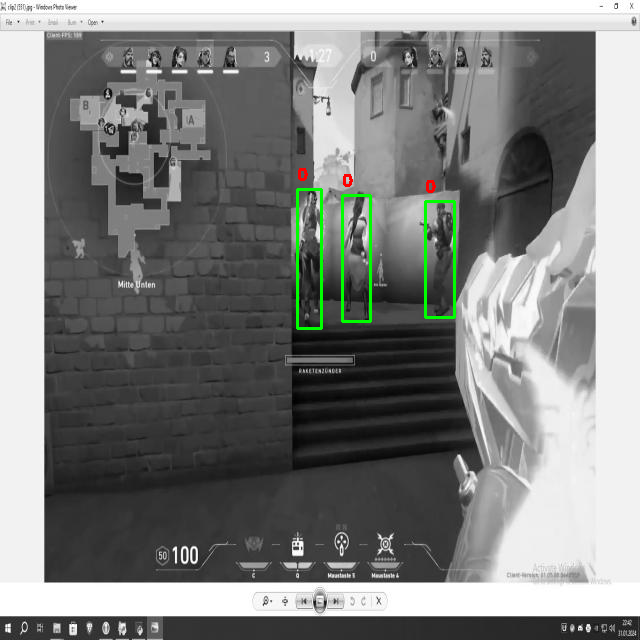

Total number of objects detected: 3
Number of persons detected: 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import torch
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import this to show images in Colab
from google.colab import files  # For downloading files

# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/best.pt', force_reload=True)

# Load an image
image_path = '/content/enemy-1/train/images/icebox__1000_jpg.rf.83ed4d9b3f944209510adca59c7b0fe8.jpg'
image = Image.open(image_path)
image_width, image_height = image.size  # Get image dimensions

# Perform inference
results = model(image_path)

# Access detection details
detections = results.pandas().xyxy[0]  # Results as a pandas DataFrame

# Convert the PIL image to an OpenCV format
image_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

# Initialize the counts
total_count = 0
person_count = 0

# Iterate through detections and draw bounding boxes and labels
for _, row in detections.iterrows():
    class_name = row['name']
    xmin = int(row['xmin'])
    ymin = int(row['ymin'])
    xmax = int(row['xmax'])
    ymax = int(row['ymax'])

    # Increase the total object count
    total_count += 1

    # Count the number of persons detected
    if class_name == "person":
        person_count += 1

    # Draw the bounding box for each detected object
    cv2.rectangle(image_cv, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

    # Prepare the label text
    label = f"{class_name}"

    # Put the label on the image
    cv2.putText(image_cv, label, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

# Display the image with bounding boxes in Google Colab
cv2_imshow(image_cv)

# Write the number of total objects and persons found to a text file
output_file_path = '/content/detection_summary.txt'
with open(output_file_path, 'w') as f:
    f.write(f"{total_count}")

# Print the detection counts
print(f"Total number of objects detected: {total_count}")
print(f"Number of persons detected: {person_count}")

# Download the text file to your local machine
files.download(output_file_path)

two enemies

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-11-21 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.


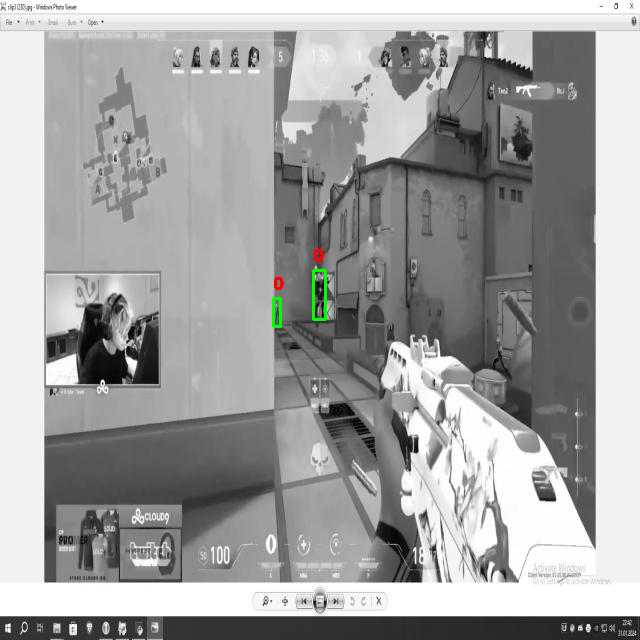

Total number of objects detected: 2
Number of persons detected: 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import torch
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import this to show images in Colab
from google.colab import files  # For downloading files

# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/best.pt', force_reload=True)

# Load an image
image_path = '/content/enemy-1/train/images/icebox__594_jpg.rf.4365108df7180d0cd6b28cac6c2c706f.jpg'
image = Image.open(image_path)
image_width, image_height = image.size  # Get image dimensions

# Perform inference
results = model(image_path)

# Access detection details
detections = results.pandas().xyxy[0]  # Results as a pandas DataFrame

# Convert the PIL image to an OpenCV format
image_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

# Initialize the counts
total_count = 0
person_count = 0

# Iterate through detections and draw bounding boxes and labels
for _, row in detections.iterrows():
    class_name = row['name']
    xmin = int(row['xmin'])
    ymin = int(row['ymin'])
    xmax = int(row['xmax'])
    ymax = int(row['ymax'])

    # Increase the total object count
    total_count += 1

    # Count the number of persons detected
    if class_name == "person":
        person_count += 1

    # Draw the bounding box for each detected object
    cv2.rectangle(image_cv, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

    # Prepare the label text
    label = f"{class_name}"

    # Put the label on the image
    cv2.putText(image_cv, label, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

# Display the image with bounding boxes in Google Colab
cv2_imshow(image_cv)

# Write the number of total objects and persons found to a text file
output_file_path = '/content/detection_summary.txt'
with open(output_file_path, 'w') as f:
    f.write(f"{total_count}")

# Print the detection counts
print(f"Total number of objects detected: {total_count}")
print(f"Number of persons detected: {person_count}")

# Download the text file to your local machine
files.download(output_file_path)


One enemy - right

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-11-21 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.


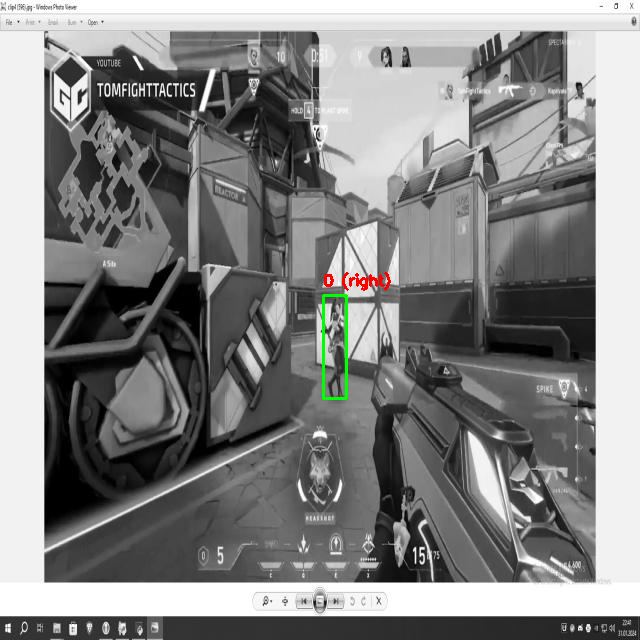

Total number of objects detected: 1
Adjusted object count: 71
Object positions:
0 (right)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import torch
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import this to show images in Colab
from google.colab import files  # For downloading files

# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/best.pt', force_reload=True)

# Load an image
image_path = '/content/enemy-1/train/images/icebox__81_jpg.rf.bf8ab0fba0940fe8aca5fa85559dabcc.jpg'
image = Image.open(image_path)
image_width, image_height = image.size  # Get image dimensions

# Perform inference
results = model(image_path)

# Access detection details
detections = results.pandas().xyxy[0]  # Results as a pandas DataFrame

# Convert the PIL image to an OpenCV format
image_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

# Initialize the counts
total_count = 0
adjusted_count = None  # Adjusted count based on object position
object_positions = []  # Store information about object positions

# Iterate through detections and draw bounding boxes and labels
for _, row in detections.iterrows():
    class_name = row['name']
    xmin = int(row['xmin'])
    ymin = int(row['ymin'])
    xmax = int(row['xmax'])
    ymax = int(row['ymax'])

    # Increase the total object count
    total_count += 1

    # Determine the horizontal position (center of the bounding box)
    box_center_x = (xmin + xmax) / 2

    # Determine if the object is on the left or right side
    position = "left" if box_center_x < image_width / 2 else "right"
    object_positions.append(f"{class_name} ({position})")

    # Draw the bounding box for each detected object
    cv2.rectangle(image_cv, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

    # Prepare the label text
    label = f"{class_name} ({position})"

    # Put the label on the image
    cv2.putText(image_cv, label, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

# Adjust the count based on the position if there's only one object
if total_count == 1:
    adjusted_count = 17 if "left" in object_positions[0] else 71
else:
    adjusted_count = total_count  # Use total count for multiple objects

# Display the image with bounding boxes in Google Colab
cv2_imshow(image_cv)

# Write the detection summary to a text file
output_file_path = '/content/detection_summary.txt'
with open(output_file_path, 'w') as f:
    f.write(f"{adjusted_count}")

# Print the detection counts and object positions
print(f"Total number of objects detected: {total_count}")
print(f"Adjusted object count: {adjusted_count}")
print("Object positions:")
for obj in object_positions:
    print(obj)

# Download the text file to your local machine
files.download(output_file_path)


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-11-21 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.


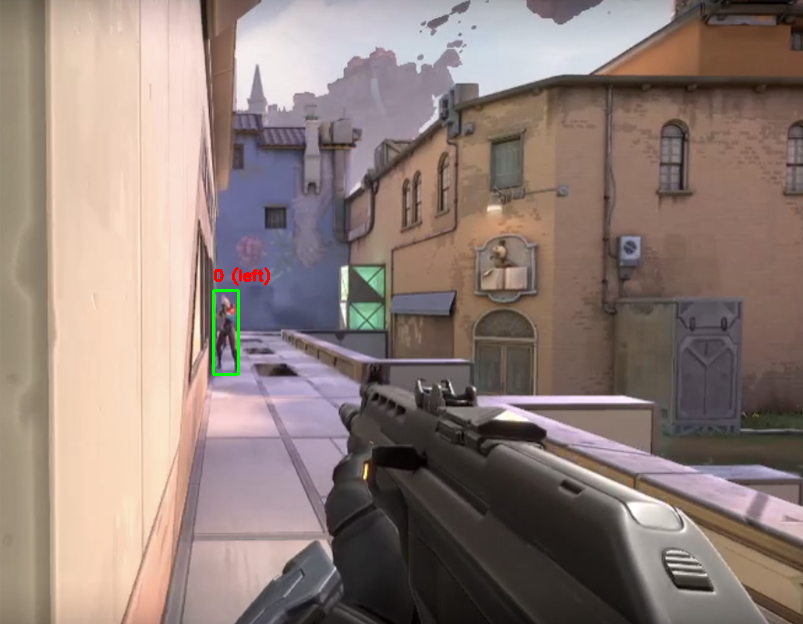

Total number of objects detected: 1
Adjusted object count: 17
Object positions:
0 (left)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import torch
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import this to show images in Colab
from google.colab import files  # For downloading files

# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/best.pt', force_reload=True)

# Load an image
image_path = '/content/netcodeheaderfinal(1).png'
image = Image.open(image_path)
image_width, image_height = image.size  # Get image dimensions

# Perform inference
results = model(image_path)

# Access detection details
detections = results.pandas().xyxy[0]  # Results as a pandas DataFrame

# Convert the PIL image to an OpenCV format
image_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

# Initialize the counts
total_count = 0
adjusted_count = None  # Adjusted count based on object position
object_positions = []  # Store information about object positions

# Iterate through detections and draw bounding boxes and labels
for _, row in detections.iterrows():
    class_name = row['name']
    xmin = int(row['xmin'])
    ymin = int(row['ymin'])
    xmax = int(row['xmax'])
    ymax = int(row['ymax'])

    # Increase the total object count
    total_count += 1

    # Determine the horizontal position (center of the bounding box)
    box_center_x = (xmin + xmax) / 2

    # Determine if the object is on the left or right side
    position = "left" if box_center_x < image_width / 2 else "right"
    object_positions.append(f"{class_name} ({position})")

    # Draw the bounding box for each detected object
    cv2.rectangle(image_cv, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

    # Prepare the label text
    label = f"{class_name} ({position})"

    # Put the label on the image
    cv2.putText(image_cv, label, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

# Adjust the count based on the position if there's only one object
if total_count == 1:
    adjusted_count = 17 if "left" in object_positions[0] else 71
else:
    adjusted_count = total_count  # Use total count for multiple objects

# Display the image with bounding boxes in Google Colab
cv2_imshow(image_cv)

# Write the detection summary to a text file
output_file_path = '/content/detection_summary.txt'
with open(output_file_path, 'w') as f:
    f.write(f"{adjusted_count}")

# Print the detection counts and object positions
print(f"Total number of objects detected: {total_count}")
print(f"Adjusted object count: {adjusted_count}")
print("Object positions:")
for obj in object_positions:
    print(obj)

# Download the text file to your local machine
files.download(output_file_path)
